<a href="https://colab.research.google.com/github/pratishthasingh1/PyBer_Analysis/blob/master/PyBer_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [203]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [204]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [205]:
total_ride_city=pyber_data_df.groupby(['type']).count()['ride_id']
total_ride_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [206]:
#  1. Get the total rides for each city type
#total urban rides
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.sum()

1625

In [207]:
#total suburban rides
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.sum()

625

In [208]:
#total rural rides
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.sum()

125

In [209]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [210]:
urban_driver_count = urban_cities_df.groupby(["type"]).sum()["driver_count"]
urban_driver_count.sum()

59602

In [211]:
suburban_driver_count = suburban_cities_df.groupby(["type"]).sum()["driver_count"]
suburban_driver_count.sum()

8570

In [212]:
rural_driver_count = rural_cities_df.groupby(["type"]).sum()["driver_count"]
rural_driver_count.sum()

537

In [213]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum() ["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [214]:
urban_fares = urban_cities_df["fare"].sum()
urban_fares

39854.380000000005

In [215]:
suburban_fares = suburban_cities_df["fare"].sum()
suburban_fares

19356.33

In [216]:
rural_fares = rural_cities_df["fare"].sum()
rural_fares

4327.929999999999

In [217]:
#  4. Get the average fare per ride for each city type. 

average_fare = pyber_data_df.groupby(["type"]).mean() ["fare"]
average_fare 

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [218]:
urban_fares = urban_cities_df["fare"]
urban_fares.mean()

24.52577230769236

In [219]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.mean()

30.97012800000002

In [220]:
rural_fares = rural_cities_df["fare"]
rural_fares.mean()

34.623440000000016

In [221]:
# 5. Get the average fare per driver for each city type. 
#Average fare for urban
average_fare_per_driver = total_fares / driver_count
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [222]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = {"Total Rides":(total_ride_city),
                    "Total Drivers": (driver_count),
                    "Total Fares": (total_fares),
                    "Average Fare per Ride": (average_fare),
                    "Average Fare per Driver": (average_fare_per_driver)}
pyber_summary_df2 = pd.DataFrame(pyber_summary_df)
pyber_summary_df2

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [223]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df2.index.name = None

In [224]:
#  8. Format the columns.
pyber_summary_df2.style.format({"Total Rides":"{:,}",
                    "Total Drivers": "{:,}" ,
                    "Total Fares": "${0:,.2f}",
                    "Average Fare per Ride": "${0:,.2f}",
                    "Average Fare per Driver": "${0:,.2f}"})


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [225]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [226]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
new_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [227]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = new_df.reset_index()

In [228]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
table = pd.pivot_table(new_df, values='fare', index=['date'],
                    columns=['type'], aggfunc=np.sum)
table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [229]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_pivot_df = table.loc['2019-01-01':'2019-04-29']
new_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [230]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_pivot_df.index = pd.to_datetime(new_pivot_df.index)
new_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [231]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    2375 non-null   object 
 1   date    2375 non-null   object 
 2   fare    2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.8+ KB


In [232]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df3 = new_pivot_df.resample('W').sum()
df3

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 1.0, 'Total Fare by City Type')

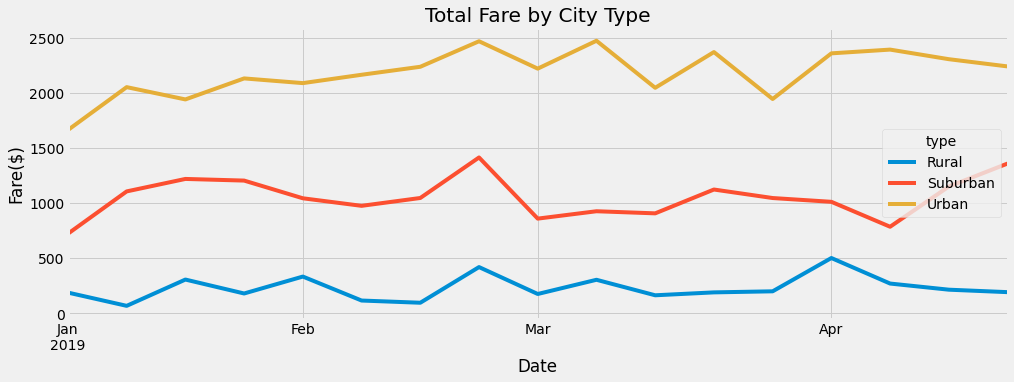

In [233]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
from matplotlib import style
style.use('fivethirtyeight')
#graph = pf.plot
df3.plot(figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Fare($)")
plt.title("Total Fare by City Type")